## Week 4 Assignment - Data Exploration and Maps for Group Project
### I will explore LA City Metro Bus data, and how bus routes/stops relate to where seniors are living in LA.
#### Carolyn Pugh

### Getting Started

In [3]:
#import the libraries I will be using below (pandas, geopandas, matplotlib, contextily)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

### Pulling in LA Metro Bus Line Data

In [4]:
#read in Metro bus lines geojson file and create dataframe
metrobusroute = gpd.read_file('Metro_Bus_Lines.geojson')

<AxesSubplot: >

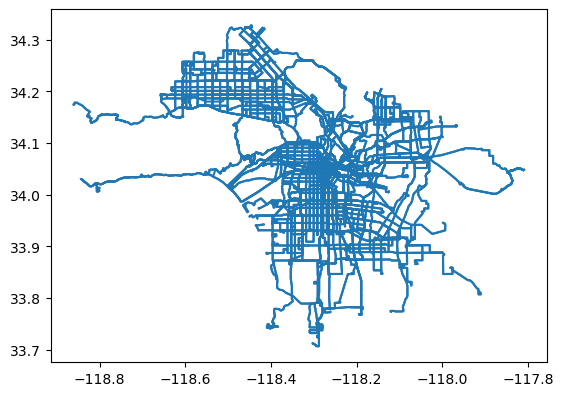

In [5]:
#What does it look like? Plot the MetroBus data
metrobusroute.plot()

In [6]:
#What columns does it have?
metrobusroute.columns.to_list()

['OBJECTID',
 'VAR_ROUTE',
 'VAR_IDENT',
 'VAR_DESCR',
 'VAR_DIREC',
 'MetroCategory',
 'MetroBusType',
 'RouteNumber',
 'RouteName',
 'TOOLTIP',
 'NLA_URL',
 'geometry']

In [26]:
#What do the first 5 rows look like?
metrobusroute.head()

,OBJECTID,Trunk Line,Identifying Number,Trip Pattern,VAR_DIREC,Metro Category,Metro Bus Type,Route Number,Route Name,TOOLTIP,NLA_URL,geometry
0,1,603,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
1,2,603,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26088 34.14528, -118.26088 34..."
2,3,605,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21045 34.01992, -118.21046 34..."
3,4,605,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.20655 34.05874, -118.20655 34..."
4,5,607,A2,New Clockwise Loop,8,ComCirc,Metro Shuttles and Circulators,607,607 Windsor Hills - Inglewood Shuttle,607 Windsor Hills - Inglewood Shuttle\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35281 33.95983, -118.35282 33..."


I will rename some of these columns to make it more obvious what they represent.

In [27]:

#Renaming columns for clarity
metrobusroute.rename(columns=
               {'VAR_ROUTE':'Trunk Line',
 'VAR_IDENT':'Identifying Number',
 'VAR_DESCR':'Trip Pattern',
 'MetroCategory': 'Metro Category',
 'MetroBusType':'Metro Bus Type',
 'RouteNumber': 'Route Number',
 'RouteName': 'Route Name'}, inplace = True)
#Displaying first 5 rows as a check
metrobusroute.head()

,OBJECTID,Trunk Line,Identifying Number,Trip Pattern,VAR_DIREC,Metro Category,Metro Bus Type,Route Number,Route Name,TOOLTIP,NLA_URL,geometry
0,1,603,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26462 34.03322, -118.26432 34..."
1,2,603,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,603,603 Glendale-Grand Sta Via San Fernando-Rampar...,603 Glendale-Grand Sta Via San Fernando-Rampar...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.26088 34.14528, -118.26088 34..."
2,3,605,N1,END TO END,0,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.21045 34.01992, -118.21046 34..."
3,4,605,S1,END TO END,1,ComCirc,Metro Shuttles and Circulators,605,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,605 Lac+usc Med Ctr Out Patient - Olympic Bl S...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.20655 34.05874, -118.20655 34..."
4,5,607,A2,New Clockwise Loop,8,ComCirc,Metro Shuttles and Circulators,607,607 Windsor Hills - Inglewood Shuttle,607 Windsor Hills - Inglewood Shuttle\nType: M...,http://www.metro.net/riding/maps/?nla_target=1...,"LINESTRING (-118.35281 33.95983, -118.35282 33..."


### Getting LA City Blockgroup Boundaries

First, I need to import two files containing relevant spatial data - a geojson file showing the boundaries of the City of Los Angeles, since that is our geographic focus. Next, a geojson file that contains block groups for the entire County of Los Angeles, since the file with the City boundary does not contain the block group information.

In [28]:
#reading in the two spatial files and naming dataframes
city_bound = gpd.read_file('City_Boundaries.geojson')
#city_bound has the boundaries of all cities in LA County
blockgroups = gpd.read_file('Census_Block_Groups_2020.geojson')
#blockgroups has hte blockgroup boundaries for all of LA County

The "city_bound" dataframe has all city boundaries in LA, and I only want to look at the City of LA (not Santa Monica, for example). Therefore I only want a subset of this dataframe.

In [29]:
#Querying the city boundary dataframe to create a new LA only boundary.
city_boundLA = city_bound.query("CITY_NAME == 'Los Angeles'").copy()

<AxesSubplot: >

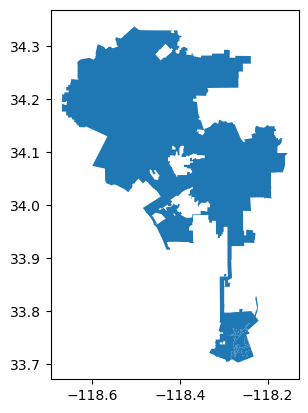

In [30]:
#Plotting the new dataframe to check that it worked.
city_boundLA.plot()

Next, I will use the "city_boundLA" dataframe to "clip" the LA county blockgroups dataframe, creating a new dataframe that contains blockgroup information for only LA city.

In [31]:
#Using "clip" to create a mask of the block boundary data and cut out everything that is outside LA city.
cityblockgroups = gpd.clip(blockgroups,city_boundLA)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

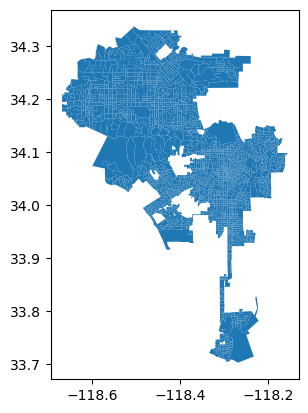

In [32]:
#Plotting the newly created clipped dataframe.
cityblockgroups.plot()

### Pulling in Bus Stop Data - "Stops Serving Lines"
#### Each stop contains data for each line served by that stop. This will be important for our analysis of what stops are accesible to block groups with high densities of senior residents.

In [33]:
#Read in file and name a new dataframe, metrobusstops
metrobusstops = gpd.read_file('StopServingLines1022.shp')

In [34]:
#print details about dataframe to check if number of columns looks correct
metrobusstops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12094 entries, 0 to 12093
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STOPNUM     12094 non-null  int64   
 1   STOPNAME    12094 non-null  object  
 2   LAT         12094 non-null  float64 
 3   LONG        12094 non-null  float64 
 4   LINE_DIR1   12094 non-null  object  
 5   LINE_DIR2   2243 non-null   object  
 6   LINE_DIR3   491 non-null    object  
 7   LINE_DIR4   178 non-null    object  
 8   LINE_DIR5   76 non-null     object  
 9   LINE_DIR6   51 non-null     object  
 10  LINE_DIR7   32 non-null     object  
 11  LINE_DIR8   21 non-null     object  
 12  LINE_DIR9   12 non-null     object  
 13  LINE_DIR10  12 non-null     object  
 14  LINE_DIR11  6 non-null      object  
 15  LINE_DIR12  6 non-null      object  
 16  LINE_DIR13  3 non-null      object  
 17  LINE_DIR14  2 non-null      object  
 18  geometry    12094 non-null  geometry
d

In [35]:
#print first 5 rows of dataframe
metrobusstops.head()

,STOPNUM,STOPNAME,LAT,LONG,LINE_DIR1,LINE_DIR2,LINE_DIR3,LINE_DIR4,LINE_DIR5,LINE_DIR6,LINE_DIR7,LINE_DIR8,LINE_DIR9,LINE_DIR10,LINE_DIR11,LINE_DIR12,LINE_DIR13,LINE_DIR14,geometry
0,1,Paramount / Slauson,33.973248,-118.113113,108-E,265-S,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.11311 33.97325)
1,3,Jefferson / 10th,34.025471,-118.328402,35-N,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.32840 34.02547)
2,6,120th / Augustus F Hawkins,33.924696,-118.242222,53-N,120-W,55-N,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.24222 33.92470)
3,7,120th / Martin Luther King Hospital,33.924505,-118.240369,55-S,120-E,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.24037 33.92451)
4,12,15054 Sherman Way,34.201075,-118.461953,162-E,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.46195 34.20108)


In [36]:
#Renaming columns for clarity
metrobusstops.rename(columns=
               {'STOPNUM':'Stop Number',
 'STOPNAME':'Stop Name'}, inplace = True)
#Displaying first 5 rows as a check
metrobusstops.head()

,Stop Number,Stop Name,LAT,LONG,LINE_DIR1,LINE_DIR2,LINE_DIR3,LINE_DIR4,LINE_DIR5,LINE_DIR6,LINE_DIR7,LINE_DIR8,LINE_DIR9,LINE_DIR10,LINE_DIR11,LINE_DIR12,LINE_DIR13,LINE_DIR14,geometry
0,1,Paramount / Slauson,33.973248,-118.113113,108-E,265-S,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.11311 33.97325)
1,3,Jefferson / 10th,34.025471,-118.328402,35-N,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.32840 34.02547)
2,6,120th / Augustus F Hawkins,33.924696,-118.242222,53-N,120-W,55-N,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.24222 33.92470)
3,7,120th / Martin Luther King Hospital,33.924505,-118.240369,55-S,120-E,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.24037 33.92451)
4,12,15054 Sherman Way,34.201075,-118.461953,162-E,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-118.46195 34.20108)


<AxesSubplot: >

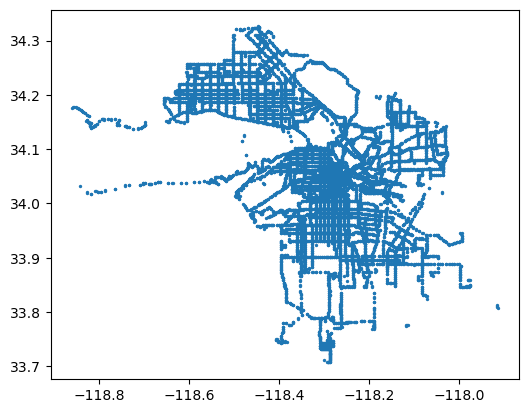

In [37]:
#plot dataframe, using smaller markersize for more clarity
metrobusstops.plot(markersize=2)


### Clipping Dataframes to get only LA City

I will use the LA city boundary dataframe to create new dataframes for both bus routes and bus stops that are specific to the City.

In [38]:
#Using "clip" to create a mask of the city boundary data and cut out bus stops that are outside the LA city boundary.
citymetrostops = gpd.clip(metrobusstops,city_boundLA)

<AxesSubplot: >

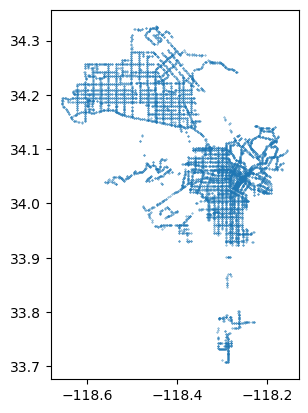

In [39]:
#plotting the clipped bus stops map to show only LA city
citymetrostops.plot(markersize=.1)

Now I have a map of showing the location of all the Metro Bus Stops in LA City. Next, I will do the same for the Metro Bus Routes.

In [40]:
#Using "clip" to create a mask of the city boundary data and cut out bus route data that is outside the LA city boundary.
citybusroute = gpd.clip(metrobusroute,city_boundLA)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


<AxesSubplot: >

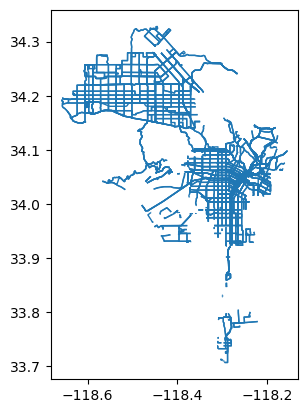

In [41]:
#Plot new bus route dataframe to check that it worked.
citybusroute.plot(linewidth=1)

This worked well, and now I have dataframes showing Metro bus routes and stops in the City of LA. 

### Plotting Metro Bus Stops with Density of Seniors

I want to make a map that overlays LA Metro Bus Stops on my teammmate Lucy's map of density of seniors in the City of LA. 

In [42]:
#Pull in the senior population density dataframe from Lucy's data cleaning work.
seniors=gpd.read_file('Senior_Pop_Density.geojson')
seniors.head()

,BG20,ShapeSTArea,FIPS,Age 65-74,Age 75-84,Age 85+,Total Senior Pop,Square Miles,Pop Density,geometry
0,2742023,1.045276e+06,060372742023,0,0,13,13,0.403581,32.0,"POLYGON ((-118.46464 33.97641, -118.46508 33.9..."
1,2739025,5.131686e+06,060372739025,120,38,0,158,1.981346,80.0,"MULTIPOLYGON (((-118.47291 33.98356, -118.4713..."
2,2739024,1.861628e+06,060372739024,90,10,0,100,0.718775,139.0,"POLYGON ((-118.46565 33.97974, -118.46587 33.9..."
3,2739023,1.218168e+06,060372739023,92,137,11,240,0.470335,510.0,"POLYGON ((-118.46315 33.98615, -118.46310 33.9..."
4,2735023,4.868382e+06,060372735023,29,40,0,69,1.879684,37.0,"POLYGON ((-118.47672 33.98746, -118.47506 33.9..."


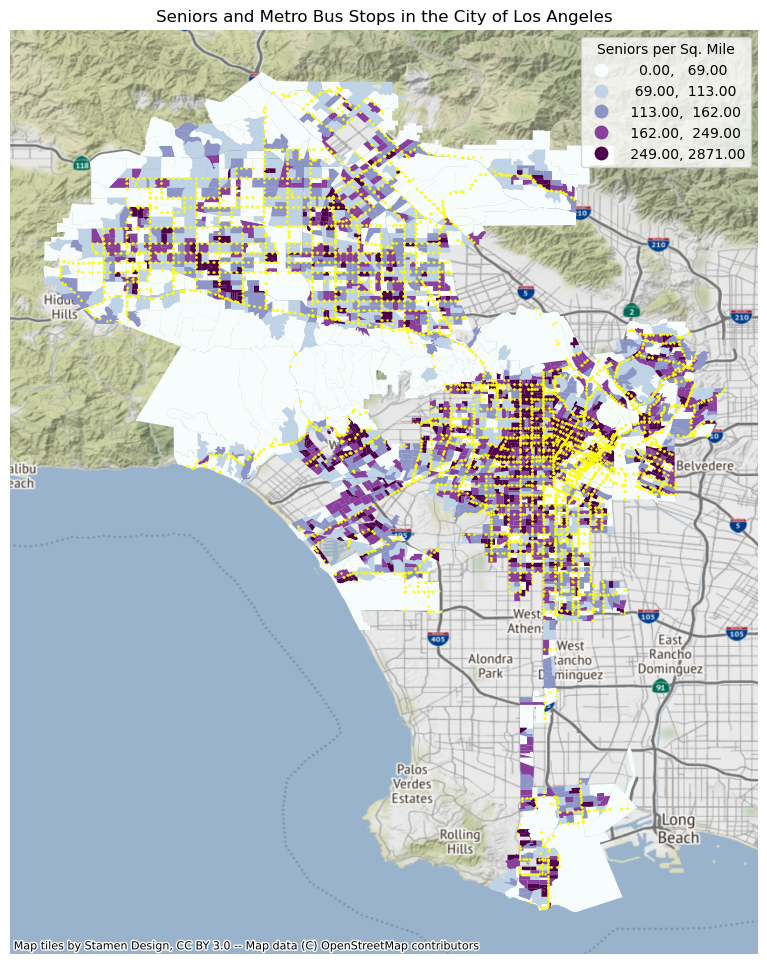

In [43]:
#Plot Bus Stops on top of Senior Population Density
fig,ax = plt.subplots(figsize=(12,12))
ax1=seniors.plot(ax=ax,column='Pop Density',scheme='quantiles',legend=True,cmap='BuPu',
              legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Seniors per Sq. Mile'
            }),
ax2=citymetrostops.plot(ax=ax,marker='.',markersize=2,legend=True,color='yellow')

#Format plot.
ax.axis('off')
ax.set_title('Seniors and Metro Bus Stops in the City of Los Angeles')
ctx.add_basemap(ax, crs=4326)

As expected, there is a density of bus stops downtown, along with a higher density of Seniors.  There are a few notable locations such as the west side of the city where there are some areas that have denser populations of Seniors and very few bus stops.  This may be because those areas are serviced by other bus agencies.

Trying out the same thing but with LA Metro Bus Routes Data instead of Bus Stops. 

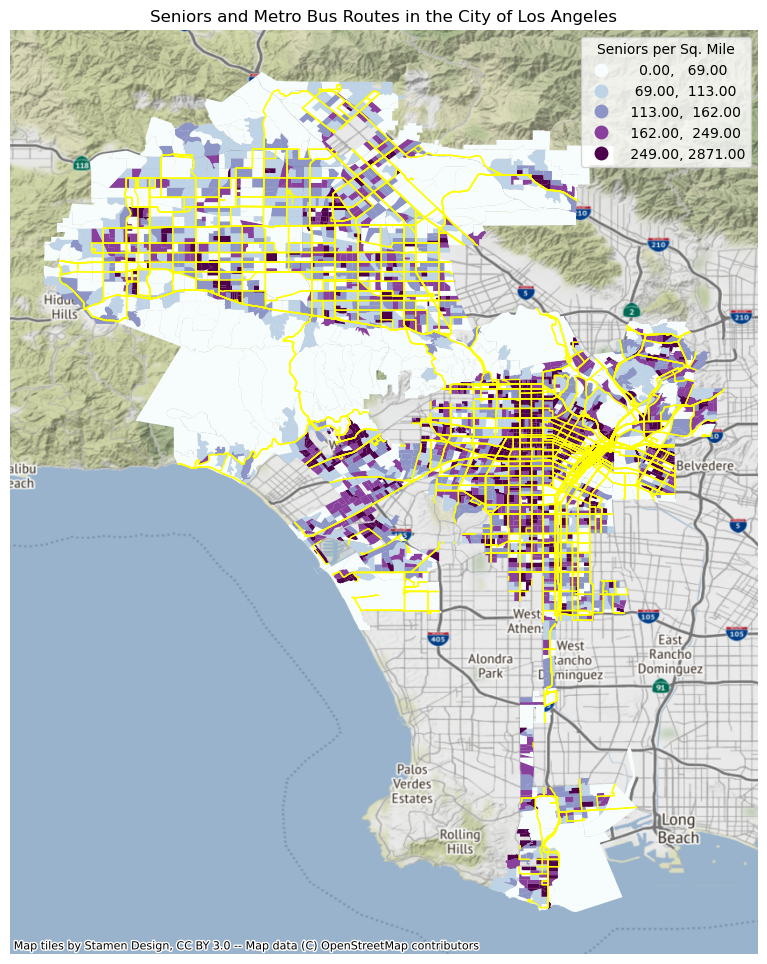

In [44]:
#Plot Metro Bus Routes on top of Senior Population Density
fig,ax = plt.subplots(figsize=(12,12))
ax1=seniors.plot(ax=ax,column='Pop Density',scheme='quantiles',legend=True,cmap='BuPu',
              legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1),
               'title': 'Seniors per Sq. Mile'
            }),
ax2=citybusroute.plot(ax=ax,marker='.',linewidth=1,legend=True,color='yellow')

#Format plot.
ax.axis('off')
ax.set_title('Seniors and Metro Bus Routes in the City of Los Angeles')
ctx.add_basemap(ax, crs=4326)

This provides similar information to the map above looking at bus stops, but is a little bit more visually appealing. Next steps of analysis will include layering on grocery store locations, and possibly focusing in on specific neighborhoods for closer analysis.  We will also need to incorporate data from other bus agencies and metro lines.